In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Date - 28 dec 2025

In [ ]:
# import preprocessing libaries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Churn_Modelling (1).csv')
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
data.shape

(10000, 14)

In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data.dtypes

,0
RowNumber,int64
CustomerId,int64
Surname,object
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64


In [ ]:
data.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
round(data.isnull().mean()*100,2)

,0
RowNumber,0.0
CustomerId,0.0
Surname,0.0
CreditScore,0.0
Geography,0.0
Gender,0.0
Age,0.0
Tenure,0.0
Balance,0.0
NumOfProducts,0.0


In [ ]:
round(data.isnull().mean()*100,2)

,0
RowNumber,0.0
CustomerId,0.0
Surname,0.0
CreditScore,0.0
Geography,0.0
Gender,0.0
Age,0.0
Tenure,0.0
Balance,0.0
NumOfProducts,0.0


In [ ]:
data.isnull().mean()*100

,0
RowNumber,0.0
CustomerId,0.0
Surname,0.0
CreditScore,0.0
Geography,0.0
Gender,0.0
Age,0.0
Tenure,0.0
Balance,0.0
NumOfProducts,0.0


In [ ]:
data.isnull().mean()

,0
RowNumber,0.0
CustomerId,0.0
Surname,0.0
CreditScore,0.0
Geography,0.0
Gender,0.0
Age,0.0
Tenure,0.0
Balance,0.0
NumOfProducts,0.0


## **Prepare the data for DL**


In [ ]:
x = data.iloc[:, 3:-1]
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [ ]:
y =data.iloc[:, -1]
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [ ]:
x.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57


In [ ]:
x =pd.get_dummies(x, drop_first = True, dtype='int')
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [ ]:
# train test split of the data

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.2, random_state = 42)

In [ ]:
# data scaling - normalization

scale = StandardScaler()

x_tarin_scaled = scale.fit_transform(x_train)
x_test_scaled = scale.transform(x_test)

In [ ]:
x_tarin_scaled

array([[ 0.35649971, -0.6557859 ,  0.34567966, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 , ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.96147213, -1.41636539, -0.69539349, ..., -0.57946723,
         1.73494238,  0.91324755],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.15932282,  0.3900109 ,  1.03972843, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [ 0.47065475,  1.15059039, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [ ]:
x_tarin_scaled[1, :]

array([-0.20389777,  0.29493847, -0.3483691 ,  0.69683765,  0.80843615,
        0.64920267,  0.97481699,  1.6612541 ,  1.72572313, -0.57638802,
        0.91324755])

In [ ]:
x_test_scaled

array([[-0.57749609, -0.6557859 , -0.69539349, ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.29729735,  0.3900109 , -1.38944225, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.52560743,  0.48508334, -0.3483691 , ..., -0.57946723,
         1.73494238, -1.09499335],
       ...,
       [ 0.81311987,  0.77030065,  0.69270405, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.41876609, -0.94100321, -0.3483691 , ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.24540869,  0.00972116, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [ ]:
# converting the scaled array into dataframe
# x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=scale.get_feature_names_out())
# x_test_scaled_df = pd.DataFrame(x_test_scaled, columns=scale.get_feature_names_out())

In [ ]:
# bulid ANN Archietecture

1) intialilize model as sequential
2) add layer ( input, hidden, output) along with activation functions, weight inializer
3) metrics, loss, optimizer

In [ ]:
# Import requires libaires for ANN

import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
print(keras.__version__)


3.10.0


In [ ]:
# builf ANN Architecture

# forwoard propogation

# 1)initalize model

model = Sequential()

# 2) building layer

# 1. input layer
model.add(Dense(units=11, kernel_initializer= 'he_uniform', input_dim=11 ))      # unit- no of nueron

# 2. hideen layer
model.add(Dense(units=8, activation='relu', kernel_initializer='he_uniform'))

model.add(Dense(units=6, activation='relu', kernel_initializer='he_uniform'))

#3. ouput layer
model.add(Dense(units=1, activation='sigmoid'))        # sigmoid - classification promblem

In [ ]:
# Back propogation

model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 8)              │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 6)              │            54 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 289 (1.13 KB)

 Trainable params: 289 (1.13 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
x_tarin_scaled.shape

(8000, 11)

In [ ]:
8000*0.7

5600.0

In [ ]:
# fit data inside network architecture

model_history= model.fit(x_tarin_scaled, y_train, validation_split=0.3, batch_size=10, epochs=100)


Epoch 1/100
560/560 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7346 - loss: 0.6141 - val_accuracy: 0.7887 - val_loss: 0.5241
Epoch 2/100
560/560 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7982 - loss: 0.4965 - val_accuracy: 0.7933 - val_loss: 0.4931
Epoch 3/100
560/560 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8082 - loss: 0.4646 - val_accuracy: 0.7979 - val_loss: 0.4727
Epoch 4/100
560/560 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8089 - loss: 0.4500 - val_accuracy: 0.7983 - val_loss: 0.4619
Epoch 5/100
560/560 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8189 - loss: 0.4229 - val_accuracy: 0.8012 - val_loss: 0.4530
Epoch 6/100
560/560 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8036 - loss: 0.4336 - val_accuracy: 0.8037 - val_loss: 0.4469
Epoch 7/100
560/560 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8170 - loss: 0.4083 - val_accuracy: 0.8054 - val_loss: 0.4390
Epoch 8/100
560/560 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8090 - loss: 0.4187 - val_accu

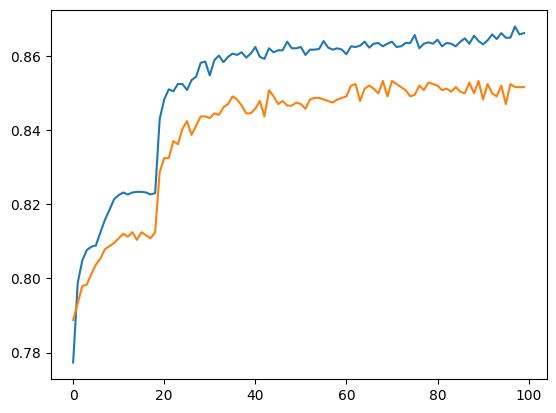

In [ ]:
# plot accuracy and validation accuracy

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])

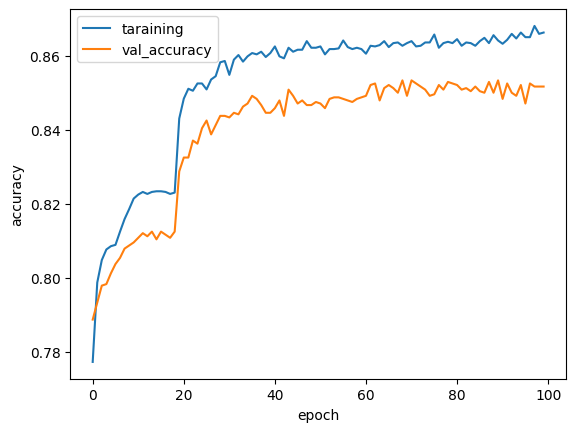

In [ ]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['taraining', 'val_accuracy'])

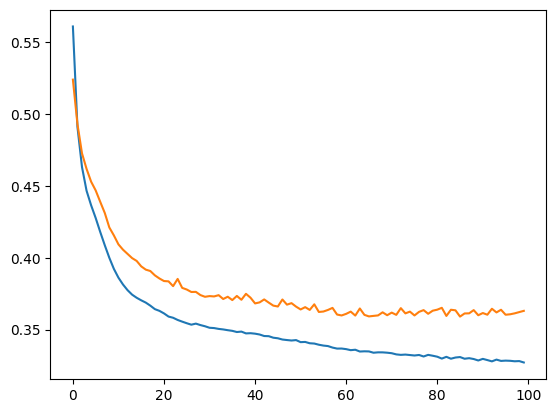

In [ ]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])

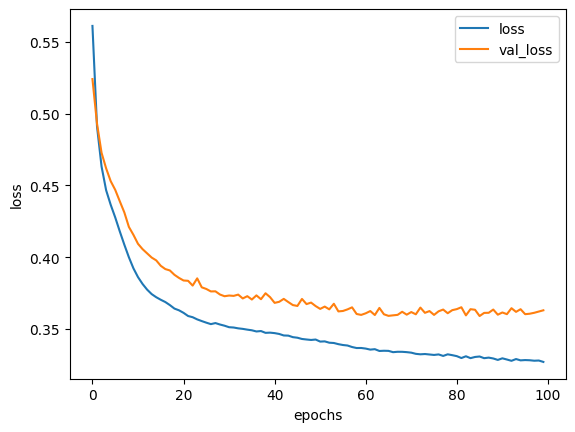

In [ ]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['loss', 'val_loss'])

In [ ]:
# predict result

y_pred = model.predict(x_test_scaled)
y_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[0.04028717],
       [0.01590002],
       [0.16348585],
       ...,
       [0.69917196],
       [0.07646762],
       [0.25355878]], dtype=float32)

In [ ]:
y_pred1= (y_pred>0.5)
y_pred1

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

In [ ]:
y_pred1.shape

(2000, 1)

In [ ]:
x_test_scaled.shape


(2000, 11)

In [ ]:
x_test_scaled[2, :]

array([-0.52560743,  0.48508334, -0.3483691 , -1.21847056,  0.80843615,
        0.64920267, -1.02583358, -0.72797953, -0.57946723,  1.73494238,
       -1.09499335])

In [ ]:
y_pred[1]

array([0.01590002], dtype=float32)

In [ ]:
y_pred[2]

array([0.16348585], dtype=float32)

In [ ]:
y_train

,Exited
9254,0
1561,0
1670,1
6087,1
6669,1
...,...
5734,0
5191,0
5390,1
860,1


In [ ]:
y_test

,Exited
6252,0
4684,0
1731,0
4742,0
4521,0
...,...
6412,1
8285,0
7853,1
1095,1


              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1607
           1       0.69      0.46      0.55       393

    accuracy                           0.85      2000
   macro avg       0.78      0.70      0.73      2000
weighted avg       0.84      0.85      0.84      2000

0.853


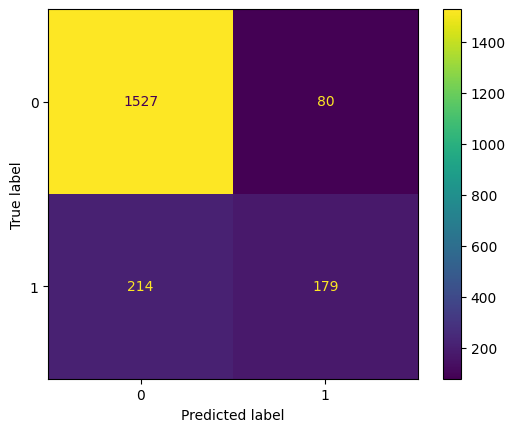

In [ ]:
# Confusion Metrics

from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score

cm= ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

report= classification_report(y_test, y_pred)

score = accuracy_score(y_pred, y_test)
print(cm)
print(report)
print(score)


In [ ]:
round(data['Exited'].value_counts(normalize=True)*100, 2)

In [ ]:
data['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [ ]:
data['Exited'].value_counts(normalize=True)*100

,proportion
Exited,
0,79.63
1,20.37
